## Exercise 1
Tasks:
- Cluster the types of crimes based on the success of the police in facing/solving them.
- Cluster the types of crimes and explain what each cluster represents.
- Identify outliers in crime types and explain what they represent/why they are outliers.
- Try to predict the super-category (e.g. ΕΠΙΚΡΑΤΕΙΑ/ΚΛΟΠΕΣ-ΔΙΑΡΡΗΞΕΙΣ, ...) of a record given only its numeric fields (τελ/να, απόπειρες, εξιχνιάσεις, ημεδαποί, αλλοδαποί), providing an explanation of the main factors for the decision and report the performance on a cross-validation evaluation.


### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FILE_NAME = "2016_epikrateia.xlsx"

# load the first two sheets
dfs = pd.read_excel(FILE_NAME, sheet_name=[0, 1])
data_df = dfs[0]  # type: pd.DataFrame
superclass_df = dfs[1]  # type: pd.DataFrame

data_df.head()

,ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95
1,ΑΠΑΤΕΣ,3790,1189,2066,994,247
2,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22
3,ΒΙΑΣΜΟΙ,155,82,164,102,91
4,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55


In [4]:
data_df.tail()

,ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
37,Ληστείες σε πρακτορεία ΟΠΑΠ,31,5,3,3,5
38,Ληστείες σούπερ μάρκετ,127,2,50,24,10
39,Ληστείες ταχυδρομικών διανομέων,4,3,1,2,0
40,"Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων",14,2,12,8,0
41,Ληστείες χρηματαποστολών,21,2,1,3,0


In [5]:
superclass_df.head()

,ΟΝΟΜΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΛΟΙΠΑ ΕΓΚΛΗΜΑΤΑ,34805,1483,25964,21089,9573
1,ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ,75083,5469,14798,9990,3961
2,ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ,26180,720,8543,1405,451
3,ΛΗΣΤΕΙΕΣ,4738,325,1582,1295,618


For the first task we have to cluster the types of crimes based on the success of the police in facing/solving them.

In order to achieve this, we have to keep the columns "τελ/να" and "απόπειρες" as well as the values in the column
"ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ".

However, we need to tranform the data use as columns the data from "ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ" and values the data from  columns "τελ/να" and "απόπειρες".

In [6]:

indexes = ["τελ/να", "εξιχνιάσεις"]
task_1_df = pd.DataFrame(columns=data_df['ΟΝΟΜΑ ΕΓΚΛΗΜΑΤΟΣ'].tolist(), index=indexes)
for i in indexes:
    task_1_df.loc[i] = data_df[i].tolist()
task_1_df.head()

,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,ΑΠΑΤΕΣ,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,ΒΙΑΣΜΟΙ,ΕΚΒΙΑΣΕΙΣ,ΕΠΑΙΤΕΙΑ,ΖΩΟΚΛΟΠΗ,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,ΛΑΘΡΕΜΠΟΡΙΟ,Ν περί ΝΑΡΚΩΤΙΚΩΝ,...,Ληστείες οδηγών ταξί,Ληστείες πρατηρίων υγρών καυσίμων,Ληστείες σε ΕΛ.ΤΑ.,Ληστείες σε Μίνι Μάρκετ-κατ/τα ψιλικών,Ληστείες σε περίπτερα,Ληστείες σε πρακτορεία ΟΠΑΠ,Ληστείες σούπερ μάρκετ,Ληστείες ταχυδρομικών διανομέων,"Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων",Ληστείες χρηματαποστολών
τελ/να,81,3790,155,155,135,3115,577,7076,1425,10892,...,173,91,19,79,105,31,127,4,14,21
εξιχνιάσεις,183,2066,174,164,89,2987,90,1660,1262,10569,...,61,28,3,26,24,3,50,1,12,1


We have to normalize the data so that the scale of each variable is the same. Why is this important?

If the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like ΑΠΑΤΕΣ or ΕΠΑΙΤΕΙΑ.

In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(task_1_df)
data_scaled = pd.DataFrame(data_scaled, columns=task_1_df.columns)
data_scaled.head()

,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,ΑΠΑΤΕΣ,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,ΒΙΑΣΜΟΙ,ΕΚΒΙΑΣΕΙΣ,ΕΠΑΙΤΕΙΑ,ΖΩΟΚΛΟΠΗ,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,ΛΑΘΡΕΜΠΟΡΙΟ,Ν περί ΝΑΡΚΩΤΙΚΩΝ,...,Ληστείες οδηγών ταξί,Ληστείες πρατηρίων υγρών καυσίμων,Ληστείες σε ΕΛ.ΤΑ.,Ληστείες σε Μίνι Μάρκετ-κατ/τα ψιλικών,Ληστείες σε περίπτερα,Ληστείες σε πρακτορεία ΟΠΑΠ,Ληστείες σούπερ μάρκετ,Ληστείες ταχυδρομικών διανομέων,"Ληστείες τραπεζών,ταχ/κών ταμιευτηρίων",Ληστείες χρηματαποστολών
0,0.002031,0.095015,0.003886,0.003886,0.003384,0.078093,0.014465,0.177394,0.035725,0.273061,...,0.004337,0.002281,0.000476,0.001981,0.002632,0.000777,0.003184,0.000100,0.000351,0.000526
1,0.012175,0.137448,0.011576,0.010911,0.005921,0.198721,0.005988,0.110438,0.083959,0.703142,...,0.004058,0.001863,0.000200,0.001730,0.001597,0.000200,0.003326,0.000067,0.000798,0.000067


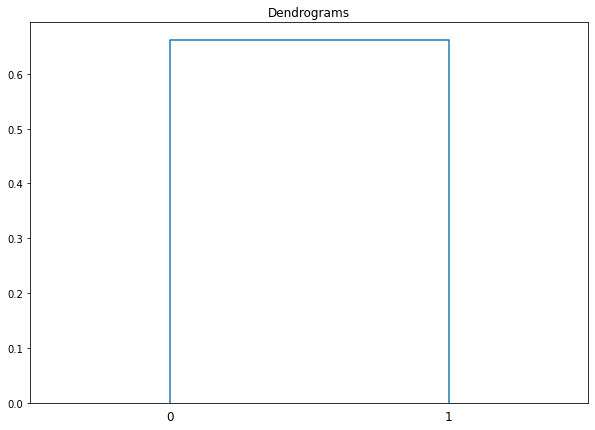

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='centroid'))